In [1]:
import os
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Define constants
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5
NUM_CLASSES = 3  # Number of classes

# Define the dataset path
dataset_path = r"C:\Users\hp\Desktop\Chest-CT-Scan-data"  # Replace with your dataset path
# Image Data Generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train and Test Generators for each class
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 376 images belonging to 3 classes.
Found 376 images belonging to 3 classes.


In [4]:

def create_cnn_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
print("Training Simple CNN Model...")
cnn_history = cnn_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Training Simple CNN Model...


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3719 - loss: 2.1639

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3680 - loss: 2.1269 - val_accuracy: 0.3457 - val_loss: 1.0946
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3564 - loss: 1.0991 - val_accuracy: 0.4096 - val_loss: 1.0874
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3455 - loss: 1.1108 - val_accuracy: 0.3723 - val_loss: 1.0930
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3469 - loss: 1.0946 - val_accuracy: 0.3723 - val_loss: 1.0804
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3791 - loss: 1.0937 - val_accuracy: 0.3856 - val_loss: 1.0867


In [6]:
def create_pretrained_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

pretrained_model = create_pretrained_model()
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pretrained_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,969,987 (285.99 MB)

 Trainable params: 51,382,275 (196.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
print("Training Pretrained ResNet50 Model...")
pretrained_history = pretrained_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Training Pretrained ResNet50 Model...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.3126 - loss: 15.8829 - val_accuracy: 0.3750 - val_loss: 4.5210
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.3740 - loss: 6.7295 - val_accuracy: 0.3457 - val_loss: 3.2756
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.3055 - loss: 2.4319 - val_accuracy: 0.3777 - val_loss: 1.0994
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.3276 - loss: 1.1612 - val_accuracy: 0.4043 - val_loss: 1.0848
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.3846 - loss: 1.0908 - val_accuracy: 0.3723 - val_loss: 1.0871


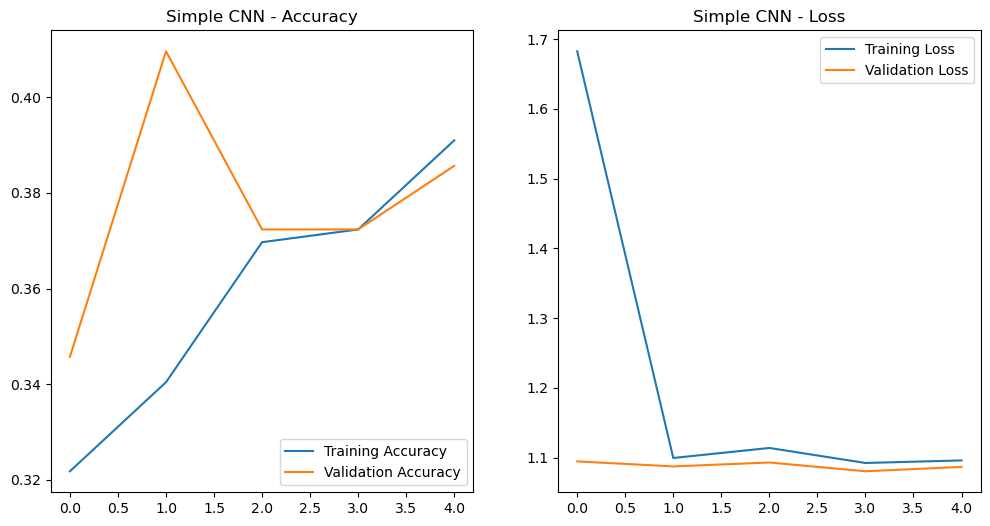

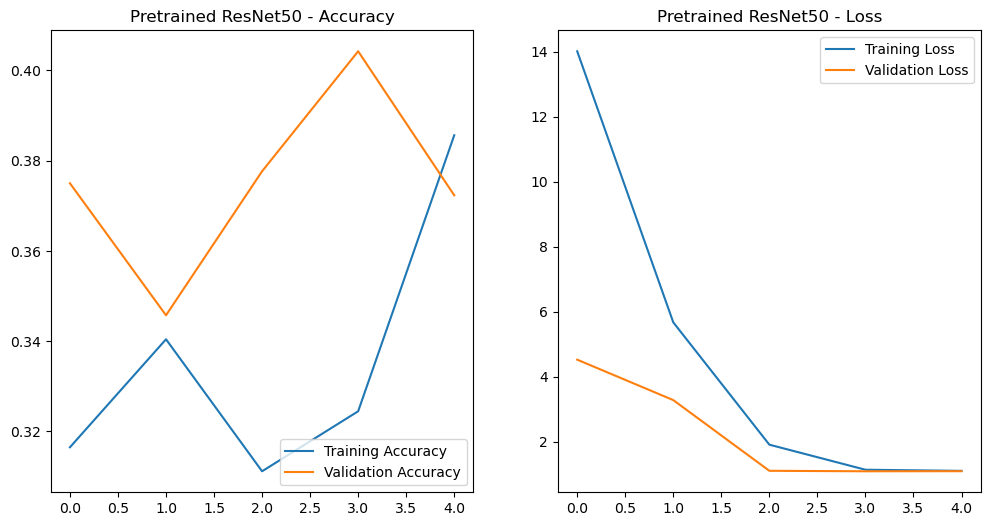

In [8]:

def plot_training_results(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Loss')
    plt.show()

# Plot results
plot_training_results(cnn_history, "Simple CNN")
plot_training_results(pretrained_history, "Pretrained ResNet50")



In [9]:
# Evaluate the Simple CNN Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_generator)
print(f"Simple CNN Model - Loss: {cnn_loss}, Accuracy: {cnn_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.3152 - loss: 1.0995
Simple CNN Model - Loss: 1.0804154872894287, Accuracy: 0.3723404109477997


In [10]:

# Evaluate the Pretrained Model
pretrained_loss, pretrained_accuracy = pretrained_model.evaluate(test_generator)
print(f"Pretrained ResNet50 Model - Loss: {pretrained_loss}, Accuracy: {pretrained_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3098 - loss: 8.2217
Pretrained ResNet50 Model - Loss: 4.520966529846191, Accuracy: 0.375


In [11]:

# Save the models
cnn_model.save('simple_cnn_model.h5')
pretrained_model.save('pretrained_resnet50_model.h5')
